In [1]:
#Import Liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Import CSV file
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Pre-Procressing & Data Cleaning

In [5]:
# Droping Columns 'dteday' since we already have
df = df.drop(['dteday'], axis = 1)

# Dropping columns ['casual', 'registered'] since we will use only the total count
df = df.drop(['casual', 'registered'], axis = 1)

# Droping Columns 'Instant'
df = df.drop(['instant'], axis = 1)

# Moving our target column to the first index position for easier analysis
col_name="cnt"
first_col = df.pop(col_name)
df.insert(0, col_name, first_col)

In [6]:
# Converting encoded data to labels of 'season'
df['season'].replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

In [7]:
# Converting encoded data to labels of 'mnth'
df['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

In [8]:
# Converting encoded data to labels of 'weathersit'
df['weathersit'].replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

In [9]:
# Converting encoded data to labels of 'weekday'

# Note, if we check the dteday column, we can see that Tuesday = 0, Wednesday = 1 ..... Monday = 6.

df['weekday'].replace((0,1,2,3,4,5,6), ('Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'), inplace=True)

In [10]:
# Converting encoded data to labels of 'yr'
df['yr'].replace((0,1), ('2018', '2019'), inplace=True)

## Data Visualization

<AxesSubplot:xlabel='yr', ylabel='cnt'>

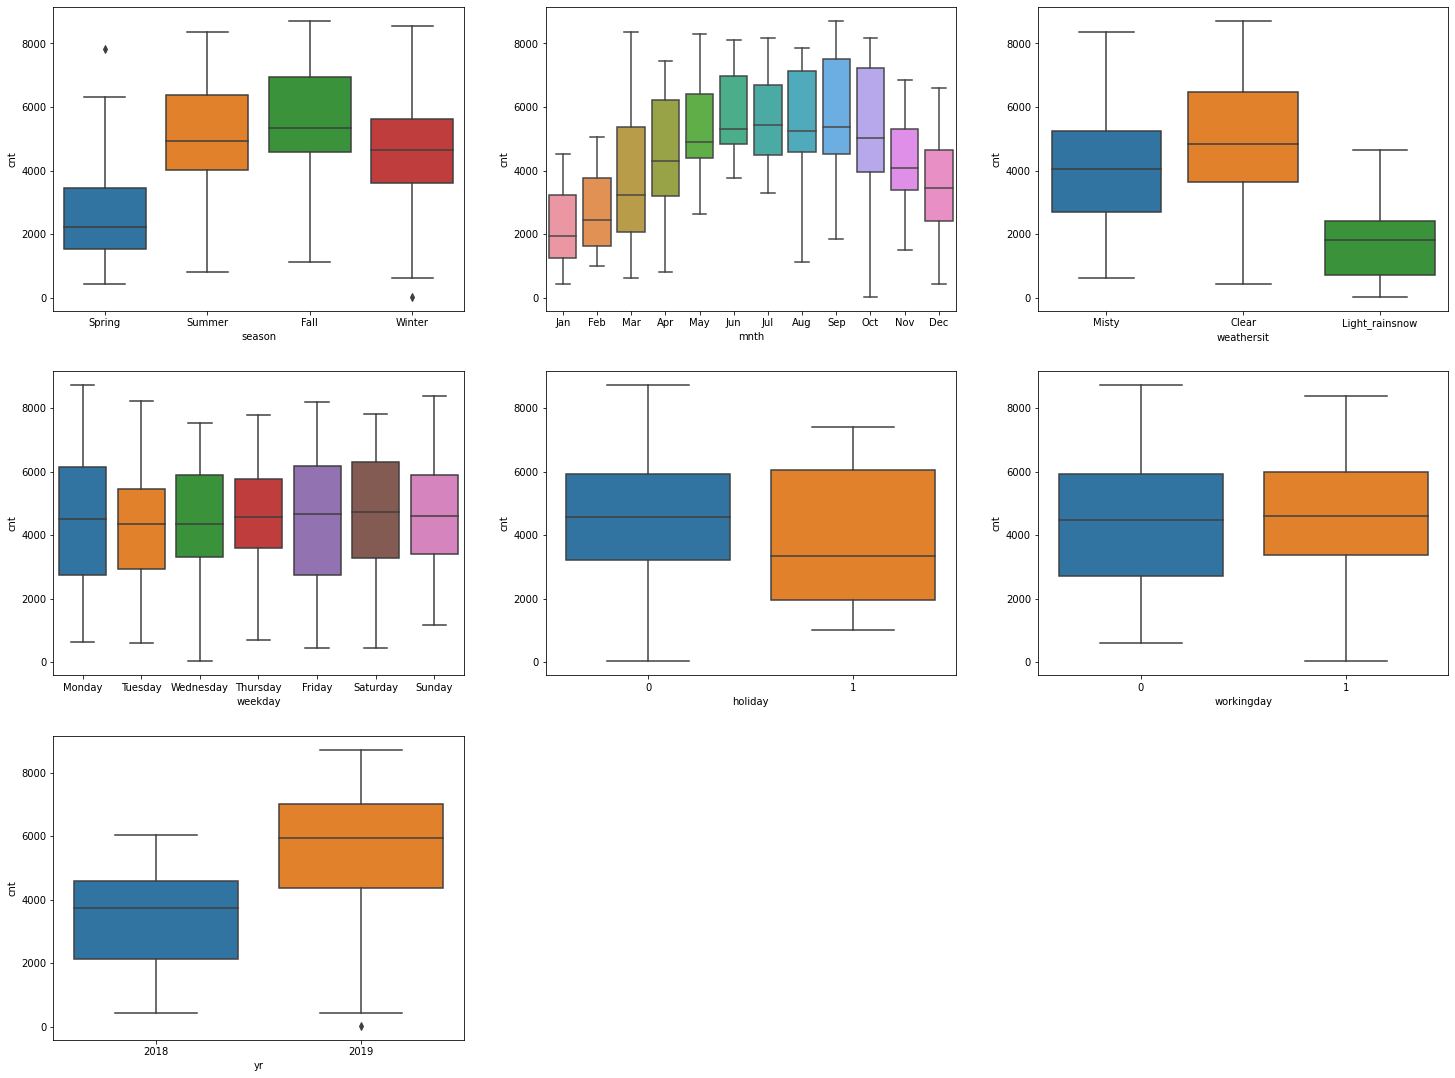

In [11]:
# Creating box plots of all categorical variables against the target variable

plt.figure(figsize=(25, 19))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

#### A few trends that we notice
1. Seasons play have effect on the number of bike rides. The same patter is reflected in the Months as well
2. The Weather has in impact on the number of bike rides 
3. There is a clear increase in number of bike rides in 2019

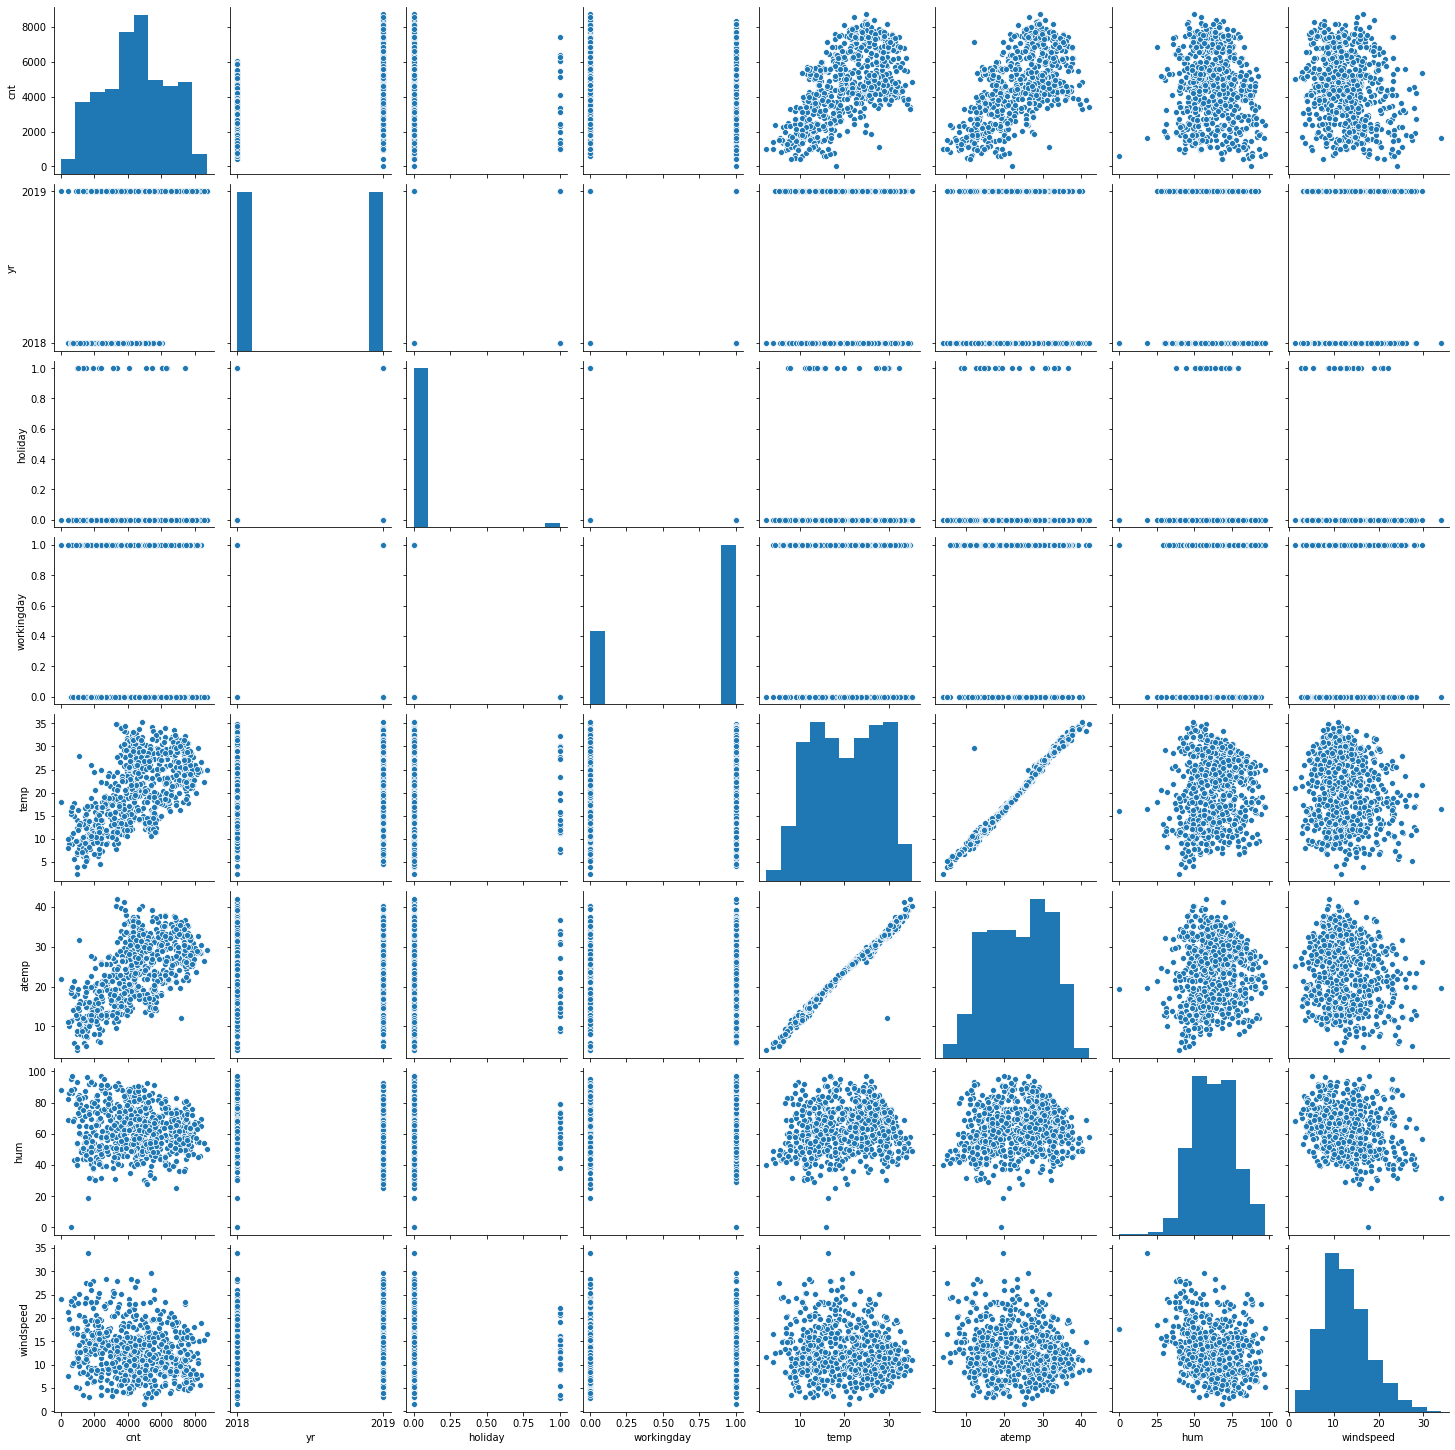

In [12]:
# Plotting Numeric variables
sns.pairplot(df)

In [13]:
#converting year to dummies
year = pd.get_dummies(df['yr'], drop_first=True)

In [14]:
#converting seasons to dummies
season = pd.get_dummies(df['season'], drop_first=True)

In [15]:
#converting weathersit to dummies
weather = pd.get_dummies(df['weathersit'], drop_first=True)

In [16]:
#converting mnth to binary
month = pd.get_dummies(df['mnth'], drop_first=True)

In [17]:
#converting days of the week to dummies
days = pd.get_dummies(df['weekday'], drop_first=True)

In [18]:
# Combining all the dummy variables to the dataframe
df = pd.concat([df, season, weather, month, days, year ], axis=1)

In [19]:
# Drop 'weathersit' since we have converted them into dummies
df = df.drop('weathersit', axis=1)

# Drop 'mnth' since Since we have seasons, and capture pretty mucht the same information
df = df.drop('mnth', axis=1)

# Drop 'season' since we have converted them into dummies
df = df.drop('season', axis=1)

# Drop 'yr' since we have converted them into dummies
df = df.drop('yr', axis=1)

# Drop 'atemp' since we are choosing temp
df = df.drop('atemp', axis=1)

# Drop 'weekday' since we have converted them into dummies
df = df.drop('weekday', axis=1)


In [20]:
df.columns

Index(['cnt', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Light_rainsnow', 'Misty', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', '2019'],
      dtype='object')

### Splitting The data into Train and Test

In [21]:
# Split df to train/test
df_train, df_test = train_test_split(df, train_size = 0.70, random_state = 911)

In [22]:
# Normalize continous values in df train
con_var = ['cnt', 'windspeed', 'temp', 'hum' ]

scalar = MinMaxScaler()
df_train[con_var] = scalar.fit_transform(df_train[con_var])

In [23]:
# Now we divide the traning set into predictor and target variable
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

## Running RFE

In [24]:
# Creating Linear regression model using sklearn 
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15 xxx
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 5),
 ('Winter', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 14),
 ('May', False, 11),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', False, 4),
 ('Monday', True, 1),
 ('Saturday', False, 12),
 ('Sunday', False, 8),
 ('Thursday', False, 13),
 ('Tuesday', True, 1),
 ('Wednesday', False, 6),
 ('2019', True, 1)]

In [25]:
# Columns sellected by RFE
X_train.columns[rfe.support_]

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter',
       'Light_rainsnow', 'Misty', 'Dec', 'Jul', 'Nov', 'Monday', 'Tuesday',
       '2019'],
      dtype='object')

In [26]:
# Columns dropped by RFE
X_train.columns[~rfe.support_]

Index(['Summer', 'Aug', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Oct', 'Sep',
       'Saturday', 'Sunday', 'Thursday', 'Wednesday'],
      dtype='object')

In [27]:
# Creating dataframe with only the columns that the RFE Sellected
cols =  X_train.columns[rfe.support_]

# This is the traning data set with RFE Sellected Variables
X_train_rfe = X_train[cols]

## Manual Model Selection

In [28]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [29]:
# Running VIF
calculateVIF(X_train_rfe)

,Features,VIF
1,workingday,28.42
13,Tuesday,6.77
12,Monday,6.17
2,temp,3.57
5,Spring,2.84
6,Winter,2.25
0,holiday,2.18
3,hum,2.04
8,Misty,1.63
11,Nov,1.61


In [30]:
# Add a y-intercept (const)
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.04e-186
Time:                        16:14:09   Log-Likelihood:                 504.43
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     495   BIC:                            -915.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2660      0.021     12.

### Model 2

In [31]:
# Droping High P value variable = ['holiday']
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

# Checking VIF of new model
calculateVIF(X_train_new)

,Features,VIF
2,hum,15.43
1,temp,15.09
0,workingday,13.80
3,windspeed,4.93
12,Tuesday,3.70
11,Monday,3.43
4,Spring,2.92
5,Winter,2.75
7,Misty,2.55
13,2019,2.08


In [32]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.04e-186
Time:                        16:14:09   Log-Likelihood:                 504.43
No. Observations:                 510   AIC:                            -978.9
Df Residuals:                     495   BIC:                            -915.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2849      0.036      7.

### Model 3 

In [33]:
# Droping High P value variable = ['holiday','Tuesday']
X_train_new = X_train_rfe.drop(['holiday','Tuesday'], axis = 1)

# Checking VIF of new model
calculateVIF(X_train_new)

,Features,VIF
2,hum,14.08
1,temp,12.66
0,workingday,4.53
3,windspeed,4.36
5,Winter,2.61
4,Spring,2.55
7,Misty,2.53
12,2019,2.06
10,Nov,1.68
11,Monday,1.68


In [34]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.15e-187
Time:                        16:14:09   Log-Likelihood:                 503.95
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     496   BIC:                            -920.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3083      0.027     11.

### Model 4

In [35]:
# Droping High P value variable & VIF = ['holiday','Tuesday','hum']
X_train_new = X_train_rfe.drop(['holiday','Tuesday','hum'], axis = 1)

# Checking VIF of new model
calculateVIF(X_train_new)

,Features,VIF
1,temp,6.28
0,workingday,4.50
2,windspeed,4.32
4,Winter,2.35
3,Spring,2.13
11,2019,2.04
9,Nov,1.67
10,Monday,1.67
6,Misty,1.62
8,Jul,1.44


In [36]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.06e-186
Time:                        16:14:10   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     497   BIC:                            -916.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2738      0.025     11.

### Sellecting Model 4

In [53]:
X_train_lm4

,const,workingday,temp,windspeed,Spring,Winter,Light_rainsnow,Misty,Dec,Jul,Nov,Monday,2019
269,1.00,1,0.71,0.19,0,1,0,1,0,0,0,0,0
482,1.00,0,0.37,0.22,0,0,0,1,0,0,0,1,1
642,1.00,1,0.68,0.16,0,1,0,0,0,0,0,0,1
249,1.00,1,0.66,0.14,0,0,1,0,0,0,0,0,0
491,1.00,1,0.58,0.47,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,1.00,1,0.85,0.17,0,0,0,1,0,0,0,0,1
95,1.00,1,0.38,0.55,0,0,0,0,0,0,0,0,0
283,1.00,1,0.61,0.25,0,1,0,1,0,0,0,0,0
572,1.00,1,0.90,0.28,0,0,0,0,0,1,0,0,1


In [37]:
# Taking a look at the parameter
lr4.params

const             0.27
workingday        0.05
temp              0.40
windspeed        -0.12
Spring           -0.15
Winter            0.07
Light_rainsnow   -0.29
Misty            -0.08
Dec              -0.07
Jul              -0.07
Nov              -0.07
Monday            0.07
2019              0.24
dtype: float64

## Resiedual Analysis

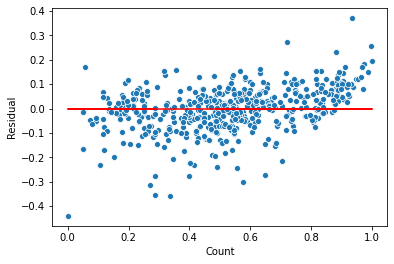

In [38]:
# Plotting the residuals to see if any pattern is visible
y_train_pred = lr4.predict(X_train_lm4)
res = y_train - y_train_pred
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### No obvious patterns visible. Hence model is homoscedacity

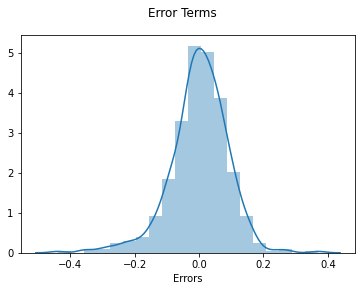

In [39]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

#### Errors are normally distrubuted with mean 0

## Making predictions on Test-Set

#### Data Pre-Procressing Test set

In [40]:
# applying Normalization on the test set

# Normalize continous values in df_test
con_var = ['cnt', 'windspeed', 'temp', 'hum' ]
df_test[con_var] = scalar.transform(df_test[con_var])

df_test.head()

,cnt,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Light_rainsnow,...,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,2019
320,0.36,0,1,0.32,0.48,0.66,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
543,0.82,0,1,0.85,0.25,0.32,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
524,0.89,0,0,0.80,0.27,0.26,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
444,0.74,0,1,0.57,0.84,0.12,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
279,0.59,0,1,0.54,0.64,-0.05,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [41]:
# Dividing test set into predictor and target variables
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [42]:
X_train_new.head()

,workingday,temp,windspeed,Spring,Winter,Light_rainsnow,Misty,Dec,Jul,Nov,Monday,2019
269,1,0.71,0.19,0,1,0,1,0,0,0,0,0
482,0,0.37,0.22,0,0,0,1,0,0,0,1,1
642,1,0.68,0.16,0,1,0,0,0,0,0,0,1
249,1,0.66,0.14,0,0,1,0,0,0,0,0,0
491,1,0.58,0.47,0,0,0,1,0,0,0,0,1


In [43]:
# Variables that were part of the final model
fin_col = X_train_new.columns

# Alter the test set to have only the final variables
X_test = X_test[fin_col]

# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)

X_test_lm4.head()

,const,workingday,temp,windspeed,Spring,Winter,Light_rainsnow,Misty,Dec,Jul,Nov,Monday,2019
320,1.00,1,0.32,0.66,0,1,0,1,0,0,1,0,0
543,1.00,1,0.85,0.32,0,0,0,0,0,0,0,0,1
524,1.00,0,0.80,0.26,0,0,0,0,0,0,0,1,1
444,1.00,1,0.57,0.12,0,0,0,1,0,0,0,0,1
279,1.00,1,0.54,-0.05,0,1,0,0,0,0,0,0,0


In [44]:
# Running the trained model on the test set, and saving the predicted values
y_pred = lr4.predict(X_test_lm4)

#### R-Squared

In [45]:
# R-Squared of traning set
train_r2 = r2_score(y_true= y_train, y_pred= y_train_pred)
test_r2 = r2_score(y_true= y_test, y_pred= y_pred)
print("Traning Set R-Squared score =", train_r2)
print("Test set R-Squared score =", test_r2)

Traning Set R-Squared score = 0.8366077397347425
Test set R-Squared score = 0.8251817180707391


In [46]:
# Difference between Traning and Test R-Squared Score
train_r2 - test_r2

0.011426021664003305

The Differene is Smaller that 5

#### R-Squared Adjusted

In [47]:
# Adjusted r2 score for train set
n = X_test.shape[0]
p = X_test.shape[1]
print('R2-Score Adjusted Training set =', round(1-(1-train_r2)*(n-1)/(n-p-1),3))
print('R2-Score Adjusted Test set =' ,round(1-(1-test_r2)*(n-1)/(n-p-1),4))

R2-Score Adjusted Training set = 0.827
R2-Score Adjusted Test set = 0.815


#### Mean Squared Error

In [48]:
print ("Mean Squared Error of Training Set = ",mean_squared_error(y_true= y_train, y_pred= y_train_pred).round(3))
print ("Mean Squared Error of Test Set = ", mean_squared_error(y_true= y_test, y_pred= y_pred).round(3))

Mean Squared Error of Training Set =  0.008
Mean Squared Error of Test Set =  0.01


# Model evaluation

Text(0, 0.5, 'y_test predicted')

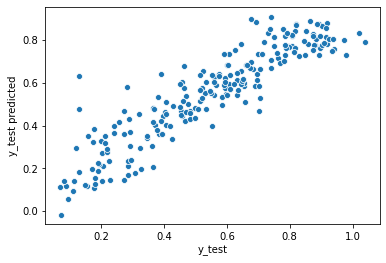

In [49]:
# Plotting y_test vs y_pred
plt.figure
sns.scatterplot(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel('y_test predicted')

Text(0, 0.5, 'y_train predicted')

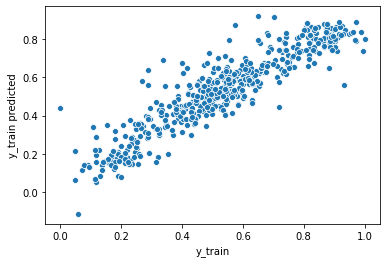

In [50]:
# Plotting y_train vs y_train predicted
plt.figure
sns.scatterplot(y_train, y_train_pred)
plt.xlabel("y_train")
plt.ylabel('y_train predicted')

#### Final Model Summary

In [51]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.06e-186
Time:                        16:14:11   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -971.7
Df Residuals:                     497   BIC:                            -916.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2738      0.025     11.

#### Final Model Summary

In [52]:
lr4.params

const             0.27
workingday        0.05
temp              0.40
windspeed        -0.12
Spring           -0.15
Winter            0.07
Light_rainsnow   -0.29
Misty            -0.08
Dec              -0.07
Jul              -0.07
Nov              -0.07
Monday            0.07
2019              0.24
dtype: float64